<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; max-width: 400px; display: flex; justify-content: center;">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" style="max-width: 50%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 3rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style="color: #08306B;">ML Project |</span> <span style="color: #08529C;">To Grant or Not to Grant</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Fall Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>João Henriques, 20240499</div>
            <div>Simone Genovese, 20241459</div>
            <div>Steven Carlson, 20240554</div>
            <div>Vinícius Pinto, 20211682</div>
            <div>Zofia Wojcik, 20240654</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            TBL Group 33
        </div>
    </div>
</div>

<div style="background: linear-gradient(to right,#08529C, #08529C); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

##### **Notebook Structure**

<ol style="list-style-type: upper-roman;font-weight: bold;">
  <li><span style="font-weight: normal;"><a href="#3">Modeling & Evaluation</a></span></li>
  <ol style="list-style-type:lower-alpha;">
    <li><span style="font-weight: normal;"><a href="#definition-of-the-problem">Definition of the Problem</a></span></li>
  </ol>
  <br>

  <ol style="list-style-type:alpha;">
    <li><span style="font-weight: normal;"><a href="#logistic-regression">Logistic Regression</a></span></li>
    <li><span style="font-weight: normal;"><a href="#naive-bayes">Naive Bayes</a></span></li>
    <li><span style="font-weight: normal;"><a href="#knn">K-Nearest Neighbors</a></span></li>
    <li><span style="font-weight: normal;"><a href="#decision-tree">Decision Tree</a></span></li>
    <li><span style="font-weight: normal;"><a href="#random-forest">Random Forest</a></span></li>
    <li><span style="font-weight: normal;"><a href="#gradient-boosting">Gradient Boosting</a></span></li>
    <li><span style="font-weight: normal;"><a href="#xgboost">XGBoost</a></span></li>
  </ol> <br>
  <ol style="list-style-type:decimal;">
    <li><span style="font-weight: normal;"><a href="#3_1">Model Selection</a></span></li>
    <li><span style="font-weight: normal;"><a href="#3_2">Model Evaluation</a></span></li>
    <li><span style="font-weight: normal;"><a href="#3_3">Model Optimization</a></span></li>
  </ol>
  <li><span style="font-weight: normal;"><a href="#📊-feature-importance">Feature Importance</a></span></li>
  <li><span style="font-weight: normal;"><a href="#🔮-test-data-prediction">Test Data Prediction</a></span></li>
  <li><span style="font-weight: normal;"><a href="#📋-csv-export---submission">CSV Export - Submission [Kaggle]</a></span></li>
</ol>

<br>

<div style="background: linear-gradient(to right,#08529C, #08529C); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## 📚 Libraries Import


In [2]:
# For data
import pandas as pd
import numpy as np
import os

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For modeling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# For evaluation
from collections import Counter
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Disable warnings [DataConversionWarning & ConvergenceWarning]
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

# Set the style of the visualization
pd.set_option('display.max_columns', None) # display all columns

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set_theme(style="white")

In [3]:
# Auxiliary function to display multiple dataframes side by side
# Source: https://python.plainenglish.io/displaying-multiple-dataframes-side-by-side-in-jupyter-lab-notebook-9a4649a4940
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args, super_title, titles=cycle([''])):
    """
    :param args: Variable number of DataFrame objects to be displayed side by side.
    :param super_title: The main title to be displayed at the top of the combined view.
    :param titles: An iterable containing titles for each DataFrame to be displayed. Defaults to an infinite cycle of empty strings.
    
    :return: None. The function generates and displays HTML content side by side for given DataFrames.
    """
    html_str = ''
    html_str += f'<h1 style="text-align: left; margin-bottom: -15px;">{super_title}</h1><br>'
    html_str += '<div style="display: flex;">'
    for df, title in zip(args, chain(titles, cycle(['</br>']))):
        html_str += f'<div style="margin-right: 20px;"><h3 style="text-align: center;color:#555555;">{title}</h3>'
        html_str += df.to_html().replace('table', 'table style="display:inline; margin-right: 20px;"')
        html_str += '</div>'
    html_str += '</div>'
    display_html(html_str, raw=True)

## 🧮 Import Databases

In [4]:
# ------------------------------------------------- Importing the dataset -------------------------------------------------
# Load the training and validation sets after feature engineering
X_train = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/X_train.parquet')
X_val = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/X_val.parquet')
test_data = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/test_data.parquet')

# Load the target variable
y_train = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/y_train.parquet').squeeze()   # .squeeze() to convert to Series
y_val = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/y_val.parquet').squeeze()

# Load the target variable encoded
y_train_encoded = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/y_train_encoded.parquet').squeeze()   # .squeeze() to convert to Series
y_val_encoded = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/y_val_encoded.parquet').squeeze()

# Load the Ordinal encoded data
X_train_ordinal_encoded = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/X_train_ordinal_encoded.parquet')
X_val_ordinal_encoded = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/X_val_ordinal_encoded.parquet')
test_data_ordinal_encoded = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/test_data_ordinal_encoded.parquet')

# Load the One-Hot encoded data
X_train_ohe = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/X_train_ohe.parquet')
X_val_ohe = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/X_val_ohe.parquet')
test_data_ohe = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/test_data_ohe.parquet')

# Check the shape of the training, validation and test data

# Check the shape of the training, validation and test data (Features
print(X_train.shape, X_val.shape, test_data.shape)
print(X_train_ordinal_encoded.shape, X_val_ordinal_encoded.shape, test_data_ordinal_encoded.shape)
print(X_train_ohe.shape, X_val_ohe.shape, test_data_ohe.shape)

# Check the shape of the training, validation and test data (Target)
print('\n',y_train.shape, y_val.shape)
print('',y_train_encoded.shape, y_val_encoded.shape)

(430519, 30) (143507, 30) (387975, 30)
(430519, 30) (143507, 30) (387975, 30)
(430519, 123) (143507, 123) (387975, 123)

 (430519,) (143507,)
 (430519,) (143507,)


In [5]:
# Display the first 2 rows of each dataset
X_train.head(2) 

,Alternative Dispute Resolution,Attorney/Representative,County of Injury,COVID-19 Indicator,District Name,Gender,Industry Code,Medical Fee Region,Number of Dependents,C-3 Date Binary,First Hearing Date Binary,Age at Injury Clean,Weekly Wage Reported,IME-4 Reported,Carrier Type Bucket,WCIO Cause of Injury Bucket,WCIO Nature of Injury Bucket,WCIO Part of Body Bucket,Accident Date Year,Accident Date Month,Accident Date Day,Accident Date Weekday,Assembly Date Year,Assembly Date Month,Assembly Date Day,Assembly Date Weekday,C-2 Date Year,C-2 Date Month,C-2 Date Day,C-2 Date Weekday
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6094685,N,N,CHAUTAUQUA,N,BUFFALO,F,56.0,I,6,1,1,47.0,0,0,1A. PRIVATE,4 - Fall,1 - Specific,V - Lower Extremities,2022.0,9.0,22.0,3.0,2022,9,27,1,2022.0,9.0,27.0,1.0
5535751,N,Y,KINGS,N,NYC,F,62.0,IV,3,0,0,52.0,1,1,1A. PRIVATE,8 - Struck,1 - Specific,II - Neck,2020.0,8.0,5.0,2.0,2020,8,13,3,2020.0,8.0,17.0,0.0


In [6]:
test_data.head(2)

,Alternative Dispute Resolution,Attorney/Representative,County of Injury,COVID-19 Indicator,District Name,Gender,Industry Code,Medical Fee Region,Number of Dependents,C-3 Date Binary,First Hearing Date Binary,Age at Injury Clean,Weekly Wage Reported,IME-4 Reported,Carrier Type Bucket,WCIO Cause of Injury Bucket,WCIO Nature of Injury Bucket,WCIO Part of Body Bucket,Accident Date Year,Accident Date Month,Accident Date Day,Accident Date Weekday,Assembly Date Year,Assembly Date Month,Assembly Date Day,Assembly Date Weekday,C-2 Date Year,C-2 Date Month,C-2 Date Day,C-2 Date Weekday
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6165911,N,N,BRONX,N,NYC,M,48.0,IV,1,1,1,19.0,0,0,1A. PRIVATE,4 - Fall,1 - Specific,V - Lower Extremities,2022.0,12.0,24.0,5.0,2023,1,2,0,2023.0,1.0,2.0,0.0
6166141,N,N,QUEENS,N,NYC,F,45.0,IV,1,1,1,19.0,0,0,1A. PRIVATE,8 - Struck,1 - Specific,I - Head,2022.0,11.0,20.0,6.0,2023,1,2,0,2023.0,1.0,2.0,0.0


# <a class='anchor' id='3'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#08529C, #08306B); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>3 | Modeling & Evaluation</b></h1></center>
</div>

<br><br>

#### **📈📉 Data Normalization**

In [7]:
# Descriptive statistics of the training data after feature engineering (Ordinal Encoded)
X_train_ordinal_encoded.describe()

,Industry Code,Number of Dependents,C-3 Date Binary,First Hearing Date Binary,Age at Injury Clean,Weekly Wage Reported,IME-4 Reported,Accident Date Year,Accident Date Month,Accident Date Day,Accident Date Weekday,Assembly Date Year,Assembly Date Month,Assembly Date Day,Assembly Date Weekday,C-2 Date Year,C-2 Date Month,C-2 Date Day,C-2 Date Weekday,Alternative Dispute Resolution,Attorney/Representative,County of Injury,COVID-19 Indicator,District Name,Gender,Medical Fee Region,Carrier Type Bucket,WCIO Cause of Injury Bucket,WCIO Nature of Injury Bucket,WCIO Part of Body Bucket
count,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000,430519.000000
mean,57.631182,3.005159,0.673975,0.737273,42.582813,0.365910,0.231734,2020.827917,6.495885,15.523336,2.498415,2021.051858,6.490167,15.653757,2.009189,2021.041649,6.479233,15.668583,2.146722,0.008996,0.316325,30.392642,0.047914,3.337846,0.600545,1.957430,1.897212,5.550238,1.087545,3.748190
std,20.921418,1.999966,0.468757,0.440116,13.720364,0.481685,0.421941,1.857243,3.456475,8.750192,1.808353,0.810441,3.445363,8.734030,1.437552,1.091358,3.428433,8.644747,1.458968,0.133807,0.465042,16.572761,0.213585,1.878883,0.506595,1.337976,1.045697,2.492914,0.423840,1.587845
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1961.000000,1.000000,1.000000,0.000000,2020.000000,1.000000,1.000000,0.000000,1996.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,1.000000,0.000000,0.000000,31.000000,0.000000,0.000000,2020.000000,3.000000,8.000000,1.000000,2020.000000,3.000000,8.000000,1.000000,2020.000000,3.000000,8.000000,1.000000,0.000000,0.000000,21.000000,0.000000,2.000000,0.000000,1.000000,1.000000,4.000000,1.000000,3.000000
50%,61.000000,3.000000,1.000000,1.000000,42.000000,0.000000,0.000000,2021.000000,7.000000,15.000000,2.000000,2021.000000,7.000000,16.000000,2.000000,2021.000000,7.000000,16.000000,2.000000,0.000000,0.000000,30.000000,0.000000,4.000000,1.000000,3.000000,1.000000,5.000000,1.000000,4.000000
75%,62.000000,5.000000,1.000000,1.000000,54.000000,1.000000,0.000000,2022.000000,9.000000,23.000000,4.000000,2022.000000,9.000000,23.000000,3.000000,2022.000000,9.000000,23.000000,3.000000,0.000000,1.000000,42.000000,0.000000,4.000000,1.000000,3.000000,3.000000,7.000000,1.000000,5.000000
max,92.000000,6.000000,1.000000,1.000000,122.000000,1.000000,1.000000,2023.000000,12.000000,31.000000,6.000000,2022.000000,12.000000,31.000000,6.000000,2024.000000,12.000000,31.000000,6.000000,2.000000,1.000000,62.000000,1.000000,7.000000,3.000000,4.000000,5.000000,10.000000,3.000000,6.000000


In [8]:
# Standardize the data [For the 'KNN' and 'Logistic Regression' models, let's normalize the variables]
X_train_standardized = StandardScaler().fit_transform(X_train_ordinal_encoded)
X_validation_standardized = StandardScaler().fit_transform(X_val_ordinal_encoded)
X_test_standardized = StandardScaler().fit_transform(test_data_ordinal_encoded)

In [9]:
# Min-Max Normalization
X_train_norm = MinMaxScaler().fit_transform(X_train_ordinal_encoded)
X_validation_norm = MinMaxScaler().fit_transform(X_val_ordinal_encoded)
X_test_norm = MinMaxScaler().fit_transform(test_data_ordinal_encoded)

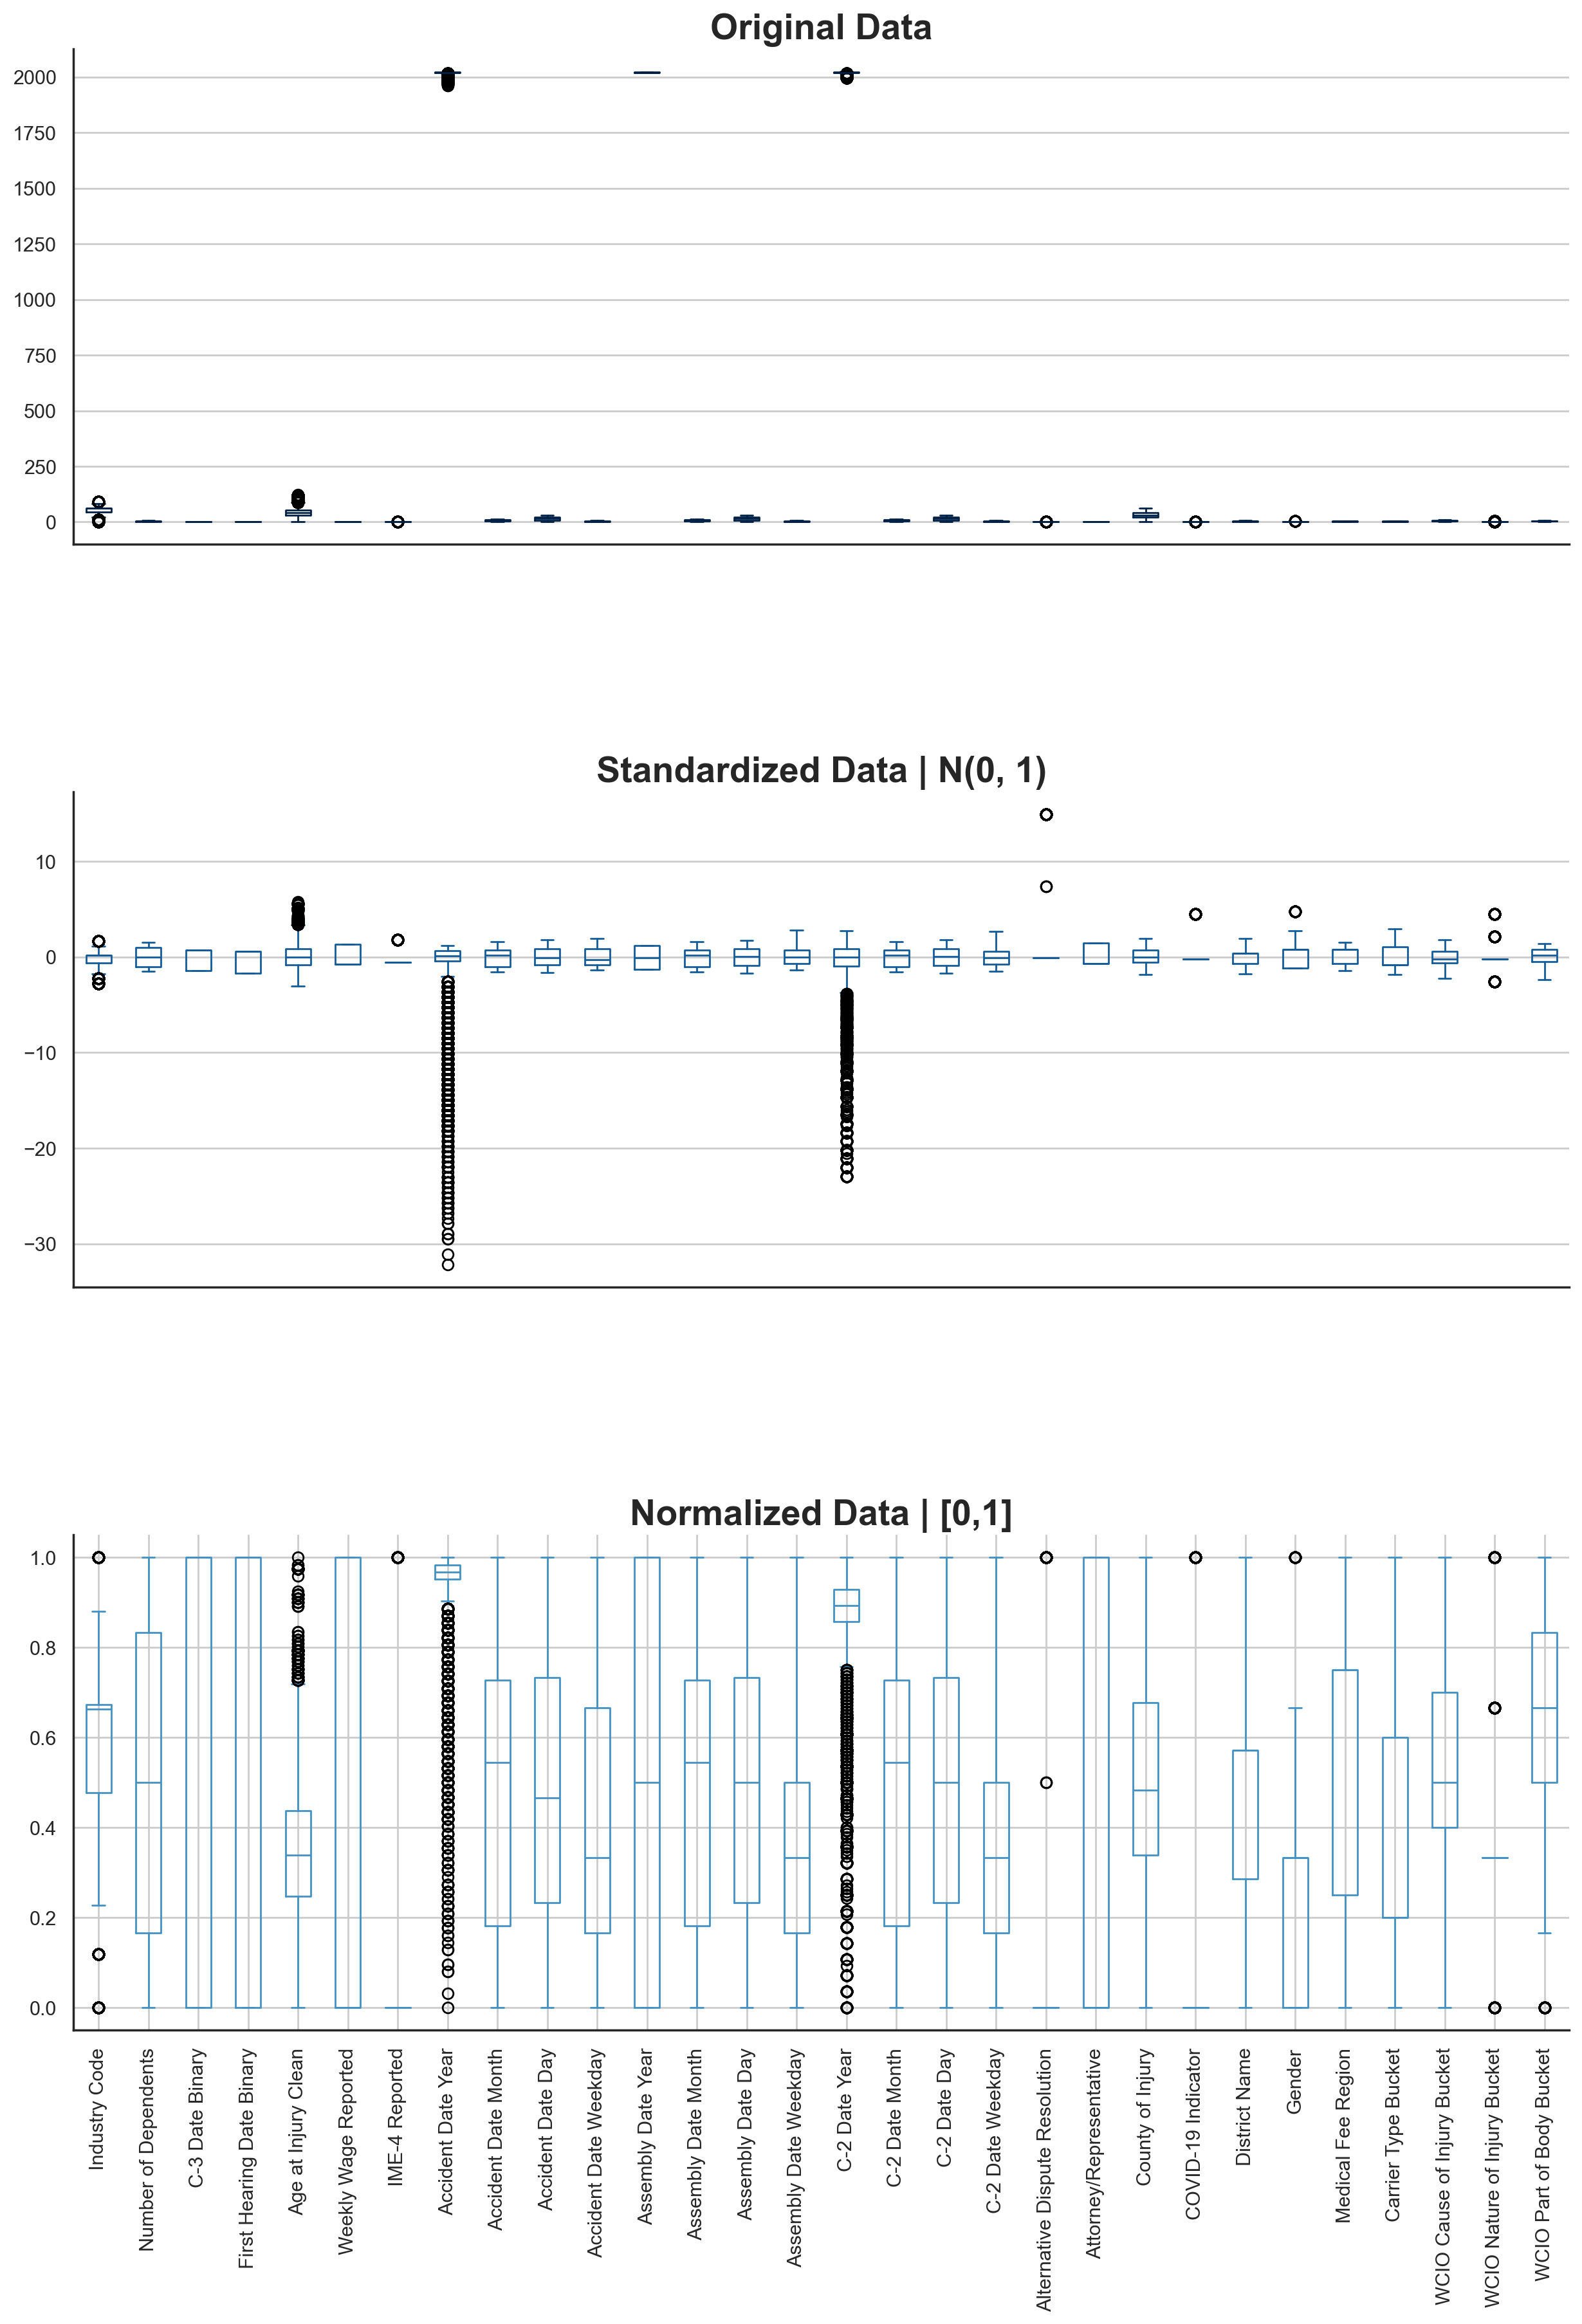

In [10]:
# Plot Boxplots of Original Data, Standardized Data and Normalized Data
fig, ax = plt.subplots(3, 1, figsize=(15, 20))

# Original Data
X_train_ordinal_encoded.boxplot(ax=ax[0], color='#002147')
ax[0].set_title('Original Data', fontsize=20, fontweight='bold')
ax[0].set_xticks([])

# Standardized Data
pd.DataFrame(X_train_standardized, columns=X_train_ordinal_encoded.columns).boxplot(ax=ax[1], color='#135C9B')
ax[1].set_title('Standardized Data | N(0, 1)', fontsize=20, fontweight='bold')
ax[1].set_xticks([])

# Normalized Data
pd.DataFrame(X_train_norm, columns=X_train_ordinal_encoded.columns).boxplot(ax=ax[2], color='#4292C6')
ax[2].set_title('Normalized Data | [0,1]', fontsize=20, fontweight='bold')
ax[2].tick_params(axis='x', rotation=90)                          # Rotate x-axis labels

# Adjust the space between subplots
plt.subplots_adjust(hspace=.3)

# Display the plot
sns.despine(top=True, right=True)
plt.show()

---

# **💡 Modeling**

### **Definition of the Problem**

> The problem consists of predict the WCB’s final decision on what type of injury (Claim Injury Type) should be granted. <br>
> Since the target variable is **category** and **multiclass**, we will use **Classification Models** to solve this problem.

In [22]:
# Function that will print the results of the classification report and the confusion matrix for both datasets (train and validation)
# Additionally, it will save results in a dictionary to compare the results of different models

models_results_train = {}
models_results_val = {}

def classification_metrics(model_name, cv_results,
                           y_train, pred_train, pred_train_proba, 
                           y_val, pred_val, pred_val_proba, classification_report=True):
    
    # Display model name
    display_html(f'<h1 style="text-align: left; margin-bottom: -15px;">{model_name}</h1><br>', raw=True)

    # Display the results of the cross-validation (KFold) - If classification_report=True
    if classification_report:
        # ------------------------------------- Classification Report  -------------------------------------
        print('___________________________________________________________________________________________________________')
        print('                                                     TRAIN                                                 ')
        print('-----------------------------------------------------------------------------------------------------------')
        print(classification_report(y_train, pred_train, target_names=[str(i) for i in np.unique(y_train)], zero_division=1))  
        # zero_division=1 to avoid warnings -> y_true contains labels that are not present in your predictions (y_pred)
        print('\nAUROC:', round(roc_auc_score(y_train, pred_train_proba, multi_class='ovr'), 2)) # 'ovr' for multiclass

        print('___________________________________________________________________________________________________________')
        print('                                                VALIDATION                                                 ')
        print('-----------------------------------------------------------------------------------------------------------')
        print(classification_report(y_val, pred_val, target_names=[str(i) for i in np.unique(y_val)], zero_division=1))
        print('\nAUROC:', round(roc_auc_score(y_val, pred_val_proba, multi_class='ovr'), 2))  # 'ovr' for multiclass
    
    # ----------------------------------- Confusion Matrix for Train and Validation side by side -----------------------------------

    # Confusion Matrix for Train and Validation side by side
    fig, ax = plt.subplots(1,2, figsize=(8,4))
    sns.heatmap(confusion_matrix(y_train, pred_train, labels=np.unique(y_val)),
                annot=True, annot_kws={"size": 7}, 
                fmt='d', cmap='Blues', cbar=False, 
                xticklabels=np.unique(y_val), yticklabels=np.unique(y_val), ax=ax[0])
    ax[0].set_title('Confusion Matrix [Train]\n', fontsize=12, fontweight='bold')
    ax[0].set_xlabel('\nPredicted', fontsize=8, fontweight='bold')
    ax[0].set_yticklabels(labels=np.unique(y_val), rotation=0)
    ax[0].set_ylabel('True\n', fontsize=8, fontweight='bold')
    
    sns.heatmap(confusion_matrix(y_val, pred_val, labels=np.unique(y_val)),
                annot=True, annot_kws={"size": 7},
                fmt='d', cmap='Blues', cbar=False, 
                xticklabels=np.unique(y_val), yticklabels=np.unique(y_val),ax=ax[1])
    ax[1].set_title('Confusion Matrix [Validation]\n', fontsize=12, fontweight='bold')
    ax[1].set_xlabel('\nPredicted', fontsize=8, fontweight='bold')
    ax[1].set_yticklabels(labels=np.unique(y_val), rotation=0)
    ax[1].set_ylabel('True\n', fontsize=8, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

    # ----------------------------------- Save the results in a dictionary -----------------------------------
    # List of All Metrics for Classification Problems - Accuracy, Precision, Recall, F1 Score Macro (Kaggle Bechmark), ROC-AUC
    models_results_train[model_name] = {
        'Time of Execution (KFold)': str(cv_results['fit_time'].sum().round(2)) + ' +/-' + str(round(np.std(np.array(cv_results['fit_time'])), 2)),
        'Accuracy': round(accuracy_score(y_train, pred_train), 2),
        'Precision': round(metrics.precision_score(y_train, pred_train, average='macro', zero_division=np.nan), 2),
        'Recall': round(metrics.recall_score(y_train, pred_train, average='macro'), 2),
        'F1 Score': round(metrics.f1_score(y_train, pred_train, average='macro'), 2),
        'AUROC': round(roc_auc_score(y_train, pred_train_proba, multi_class='ovr'), 2)
    }

    models_results_val[model_name] = {
        'Accuracy': round(accuracy_score(y_val, pred_val), 2),
        'Precision': round(metrics.precision_score(y_val, pred_val, average='macro', zero_division=np.nan), 2),
        'Recall': round(metrics.recall_score(y_val, pred_val, average='macro'), 2),
        'F1 Score': round(metrics.f1_score(y_val, pred_val, average='macro'), 2),
        'AUROC': round(roc_auc_score(y_val, pred_val_proba, multi_class='ovr'), 2)
    }

---

### **Logistic Regression [<sup>[1]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html)** <a class='anchor' id='logistic-regression'></a>

In [13]:
# ------------------------------------------------- Logistic Regression -------------------------------------------------
# ################################ Ordinal Encoding (with and without Standardization)
# ============ Without Normalization
lr_ord = LogisticRegression()
lr_cv_ord = cross_validate(lr_ord,X_train_ordinal_encoded,y_train,cv=5)

# Train the model
lr_ord.fit(X_train_norm, y_train)

# Predictions
lr_ord_pred_train = lr_ord.predict(X_train_norm)
lr_ord_pred_train_proba = lr_ord.predict_proba(X_train_norm)

lr_ord_pred_val = lr_ord.predict(X_val_ordinal_encoded)
lr_ord_pred_val_proba = lr_ord.predict_proba(X_val_ordinal_encoded)

# ============ With Normalization
lr_ord_norm = LogisticRegression()
lr_cv_ord_norm = cross_validate(lr_ord_norm,X_train_norm,y_train,cv=5)

# Train the model
lr_ord_norm.fit(X_train_norm, y_train)

# Predictions
lr_ord_norm_pred_train = lr_ord_norm.predict(X_train_norm)
lr_ord_norm_pred_train_proba = lr_ord_norm.predict_proba(X_train_norm)

lr_ord_norm_pred_val = lr_ord_norm.predict(X_val_ordinal_encoded)
lr_ord_norm_pred_val_proba = lr_ord_norm.predict_proba(X_val_ordinal_encoded)

# ################################ One-Hot Encoding
lr_ohe = LogisticRegression()
lr_cv_ohe = cross_validate(lr_ohe,X_train_ohe,y_train,cv=5)

# Train the model
lr_ohe.fit(X_train_ohe, y_train)

# Predictions
lr_ohe_pred_train = lr_ohe.predict(X_train_ohe)
lr_ohe_pred_train_proba = lr_ohe.predict_proba(X_train_ohe)

lr_ohe_pred_val = lr_ohe.predict(X_val_ohe)
lr_ohe_pred_val_proba = lr_ohe.predict_proba(X_val_ohe)

## Time of Execution Logistic Regression = 3m 51.3s

c:\Anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


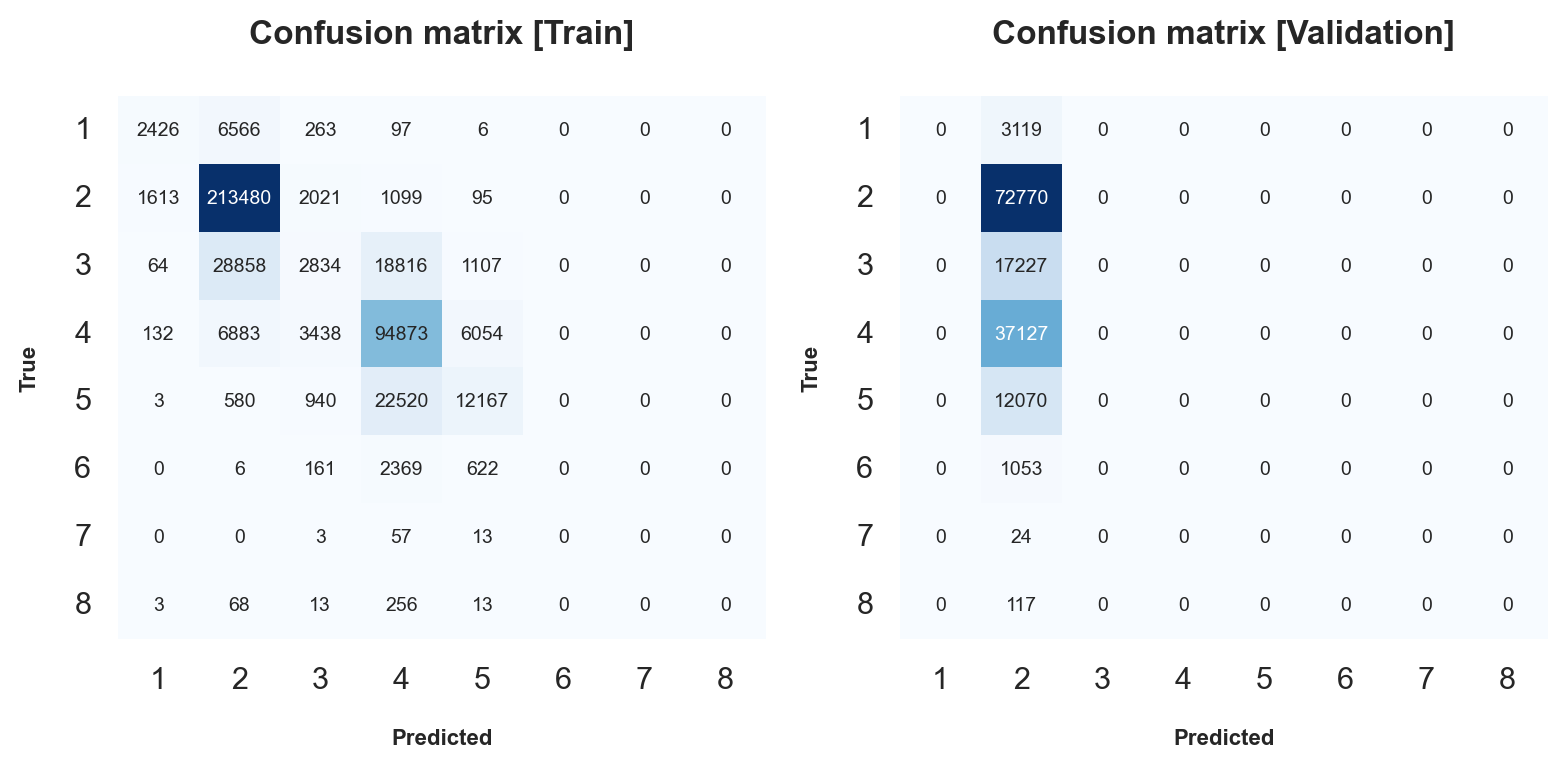

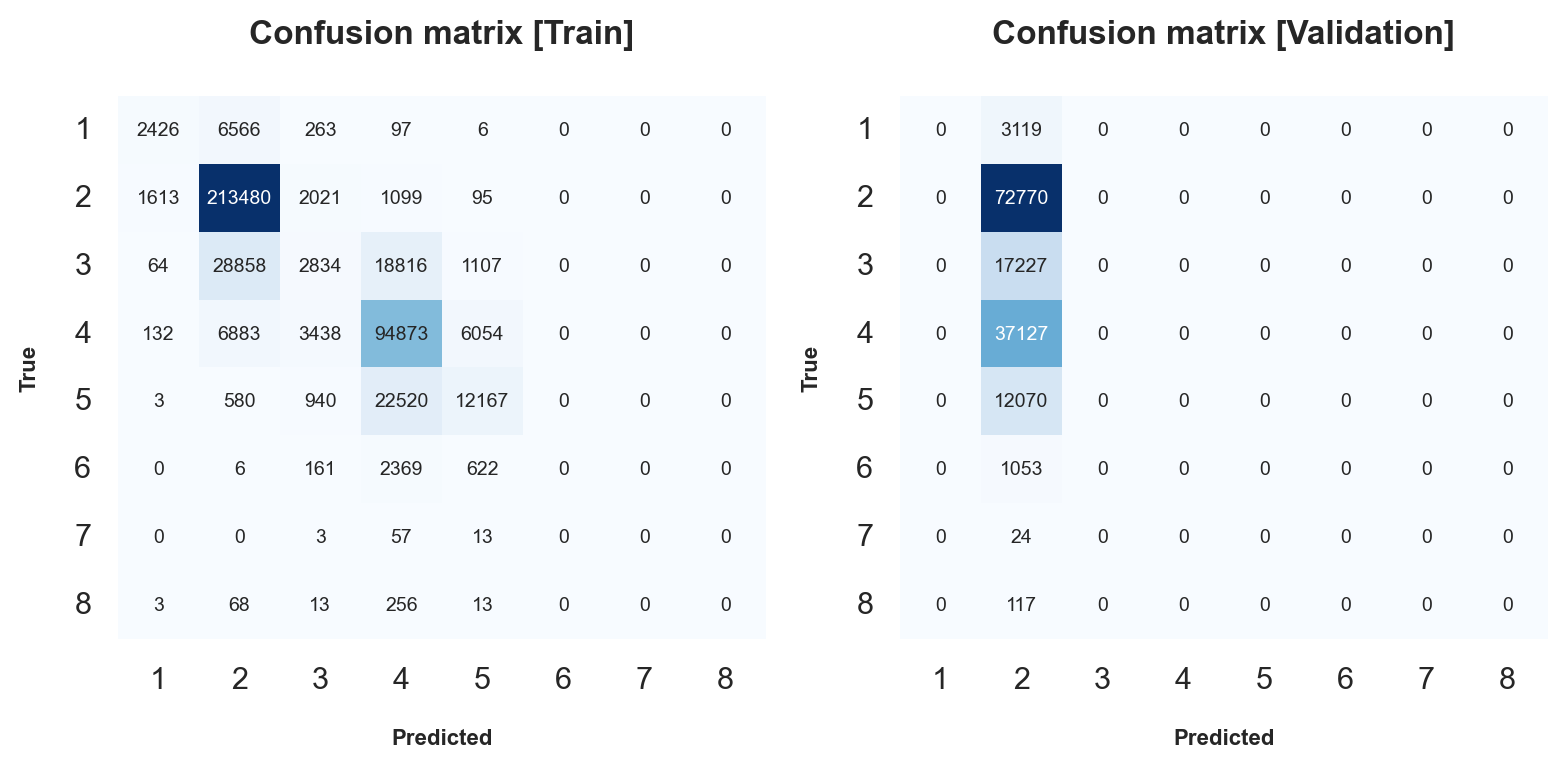

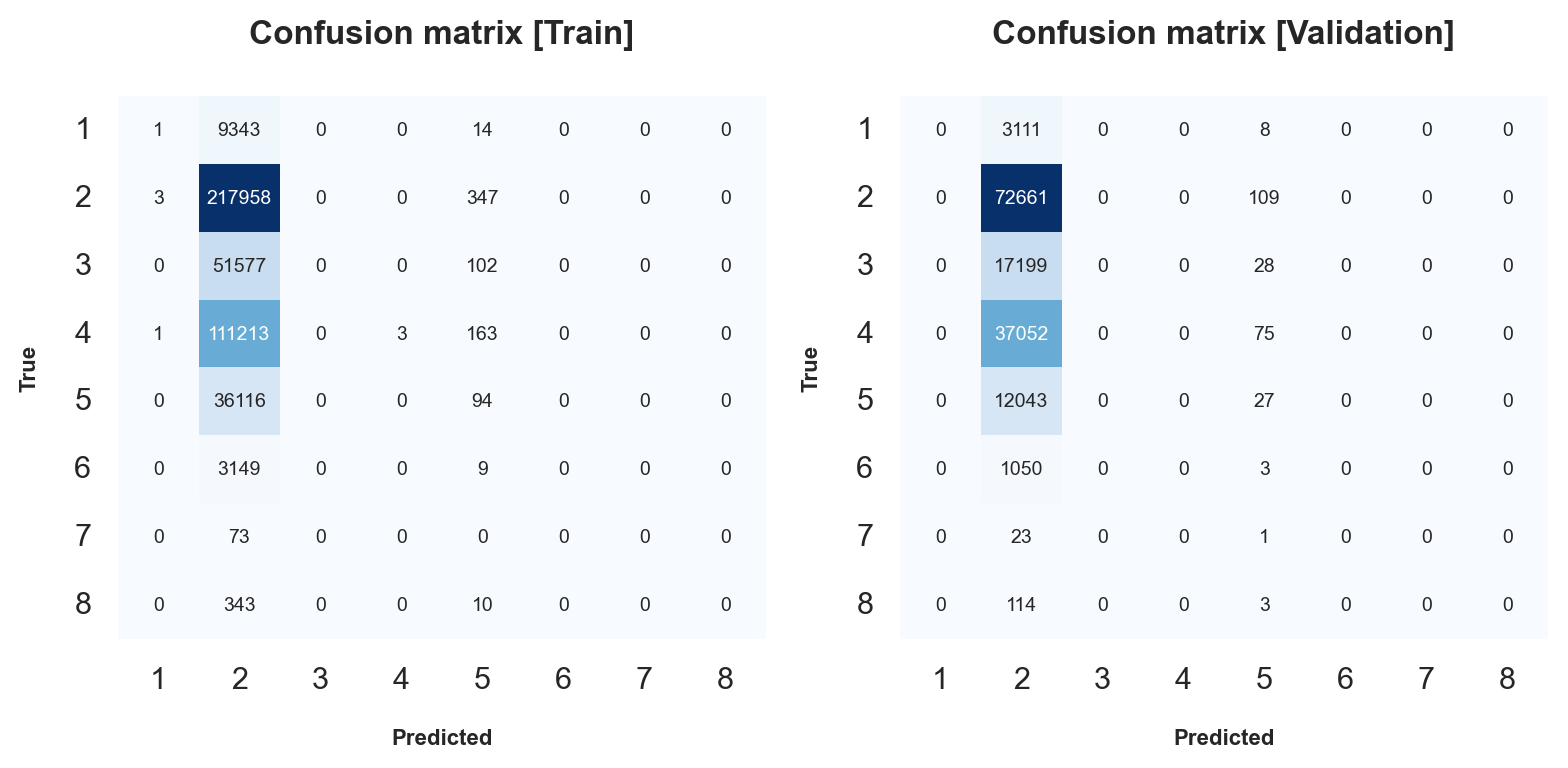

In [23]:
# Classification Metrics & Confusion Matrix
classification_metrics('Logistic Regression | Ordinal Encoding (W/o Normalization)', lr_cv_ord,
                       y_train, lr_ord_pred_train, lr_ord_pred_train_proba, 
                       y_val, lr_ord_pred_val, lr_ord_pred_val_proba, classification_report=False)

classification_metrics('Logistic Regression | Ordinal Encoding (With Normalization)', lr_cv_ord_norm,
                        y_train, lr_ord_norm_pred_train, lr_ord_norm_pred_train_proba, 
                        y_val, lr_ord_norm_pred_val, lr_ord_norm_pred_val_proba, classification_report=False)

classification_metrics('Logistic Regression | One-Hot Encoding', lr_cv_ohe,
                        y_train, lr_ohe_pred_train, lr_ohe_pred_train_proba, 
                        y_val, lr_ohe_pred_val, lr_ohe_pred_val_proba, classification_report=False)

In [25]:
# Dataframe with the results of the models
df_results_train = pd.DataFrame(models_results_train).T
df_results_val = pd.DataFrame(models_results_val).T

# Display the results
display_side_by_side(df_results_train, df_results_val, 
                     titles=['Training Set', 'Validation Set'],
                     super_title='Results of the Logistic Regression Model')

Results of the Logistic Regression Model Training Set 
 
 
 
 Time of Execution (KFold) 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Logistic Regression | Ordinal Encoding (W/o Normalization) 
 63.12 +/-0.64 
 0.76 
 0.6 
 0.31 
 0.32 
 0.9 
 
 
 Logistic Regression | Ordinal Encoding (With Normalization) 
 58.1 +/-1.09 
 0.76 
 0.6 
 0.31 
 0.32 
 0.9 
 
 
 Logistic Regression | One-Hot Encoding 
 63.66 +/-0.35 
 0.51 
 0.46 
 0.13 
 0.08 
 0.66 
 
 
 Validation Set 
 
 
 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Logistic Regression | Ordinal Encoding (W/o Normalization) 
 0.51 
 0.51 
 0.12 
 0.08 
 0.50 
 
 
 Logistic Regression | Ordinal Encoding (With Normalization) 
 0.51 
 0.51 
 0.12 
 0.08 
 0.50 
 
 
 Logistic Regression | One-Hot Encoding 
 0.51 
 0.31 
 0.13 
 0.08 
 0.64

---

### **Naive Bayes [<sup>[2]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.GaussianNB.html)** <a class='anchor' id='naive-bayes'></a>

In [30]:
# ------------------------------------------------- Naïve Bayes -------------------------------------------------
# ################################ Ordinal Encoding (with and without Standardization)
# ============ Without Normalization
nb_ord = GaussianNB()
nb_cv_ord = cross_validate(nb_ord,X_train_ordinal_encoded,y_train,cv=5)

# Train the model
nb_ord.fit(X_train_ordinal_encoded, y_train)

# Predictions
nb_ord_pred_train = nb_ord.predict(X_train_ordinal_encoded)
nb_ord_pred_train_proba = nb_ord.predict_proba(X_train_ordinal_encoded)

nb_ord_pred_val = nb_ord.predict(X_val_ordinal_encoded)
nb_ord_pred_val_proba = nb_ord.predict_proba(X_val_ordinal_encoded)

# ============ With Normalization
nb_ord_norm = GaussianNB()
nb_cv_ord_norm = cross_validate(nb_ord_norm,X_train_norm,y_train,cv=5)

# Train the model
nb_ord_norm.fit(X_train_norm, y_train)

# Predictions
nb_ord_norm_pred_train = nb_ord_norm.predict(X_train_norm)
nb_ord_norm_pred_train_proba = nb_ord_norm.predict_proba(X_train_norm)

nb_ord_norm_pred_val = nb_ord_norm.predict(X_val_ordinal_encoded)
nb_ord_norm_pred_val_proba = nb_ord_norm.predict_proba(X_val_ordinal_encoded)

# ################################ One-Hot Encoding
nb_ohe = GaussianNB()
cv_ohe = cross_validate(nb_ohe,X_train_ohe,y_train,cv=5)

# Train the model
nb_ohe.fit(X_train_ohe, y_train)

# Predictions
nb_ohe_pred_train = nb_ohe.predict(X_train_ohe)
nb_ohe_pred_train_proba = nb_ohe.predict_proba(X_train_ohe)

nb_ohe_pred_val = nb_ohe.predict(X_val_ohe)
nb_ohe_pred_val_proba = nb_ohe.predict_proba(X_val_ohe)

## Time of Execution Naïve Bayes = 26.7 s

c:\Anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
c:\Anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


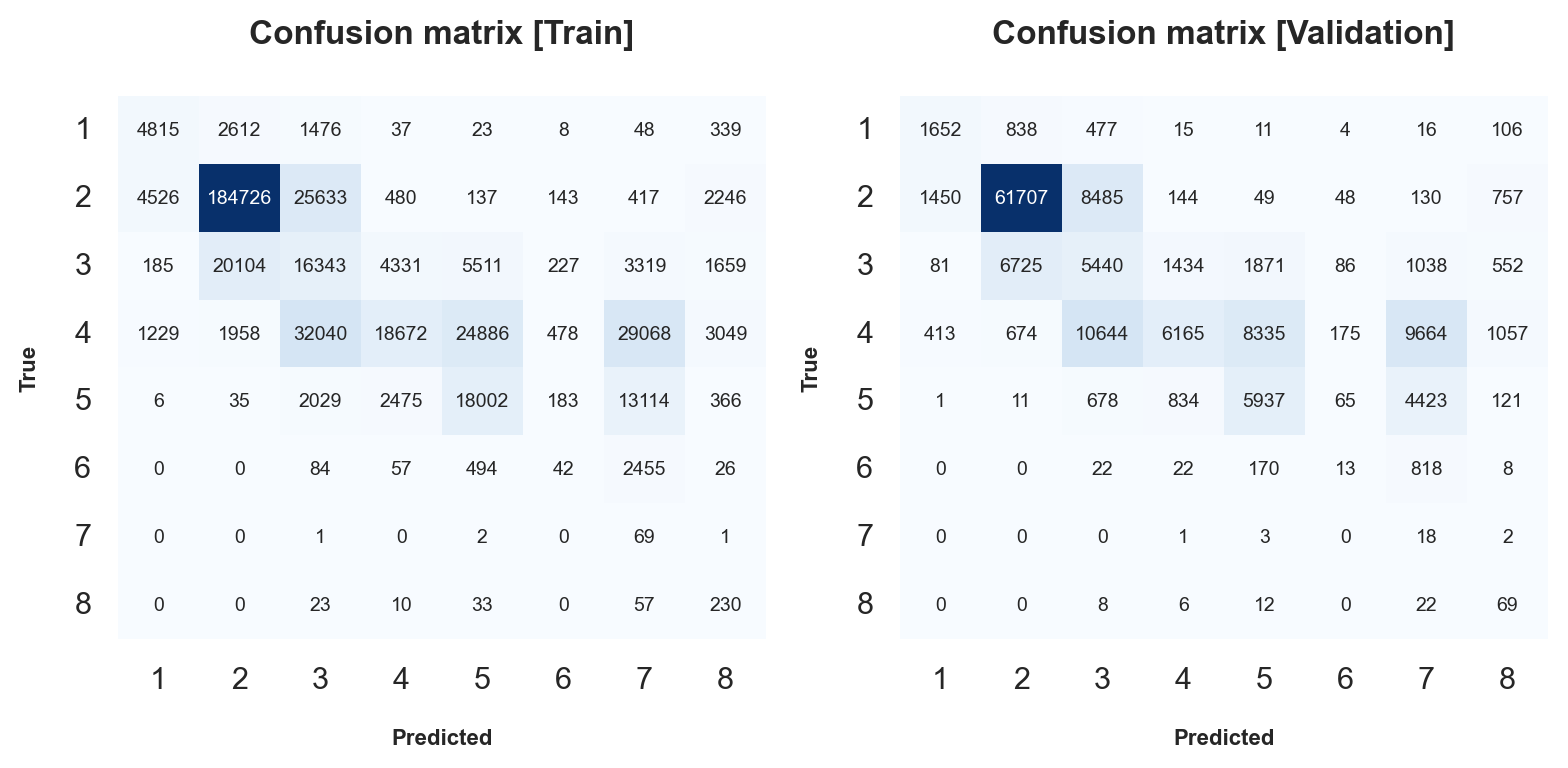

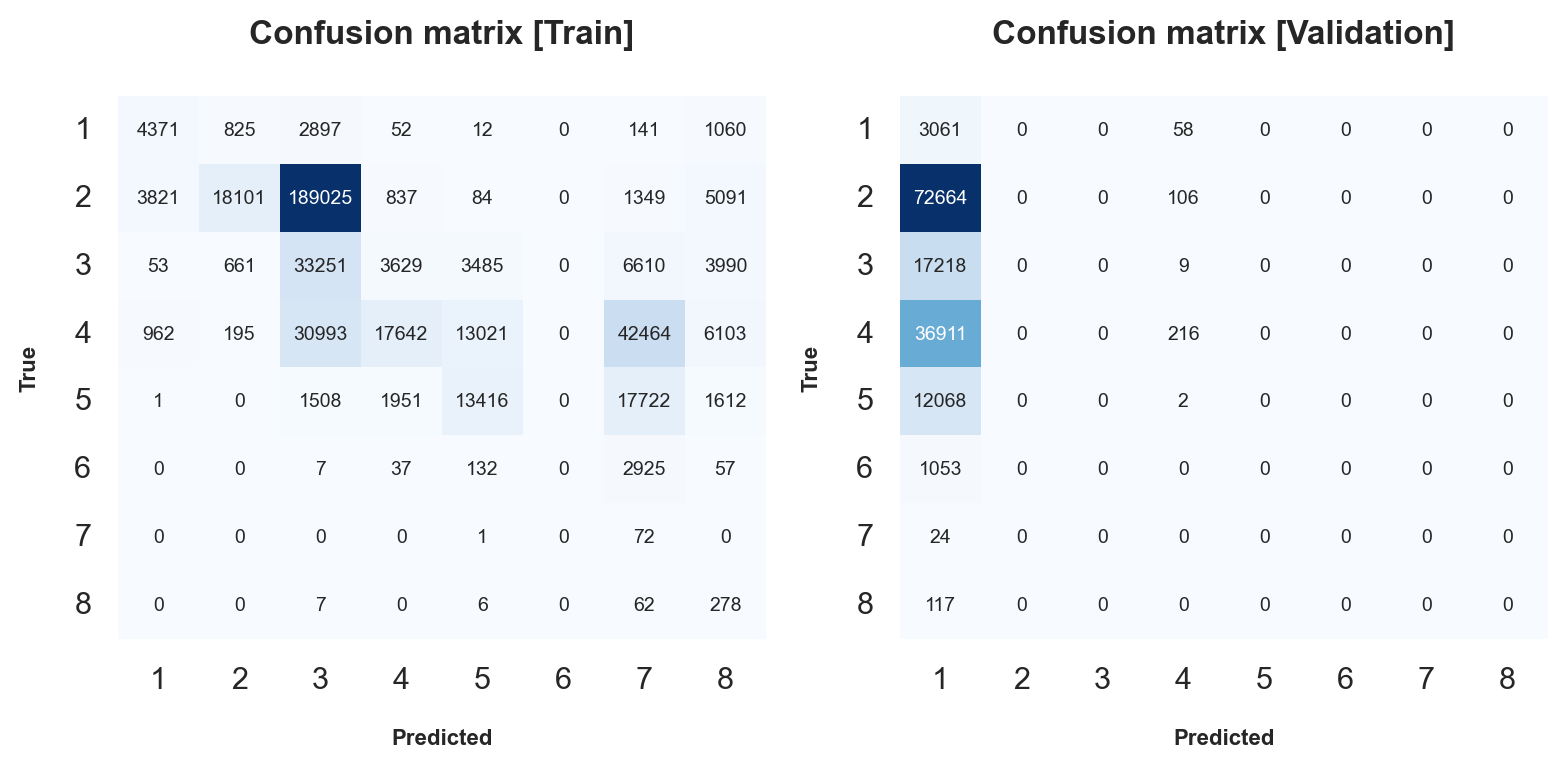

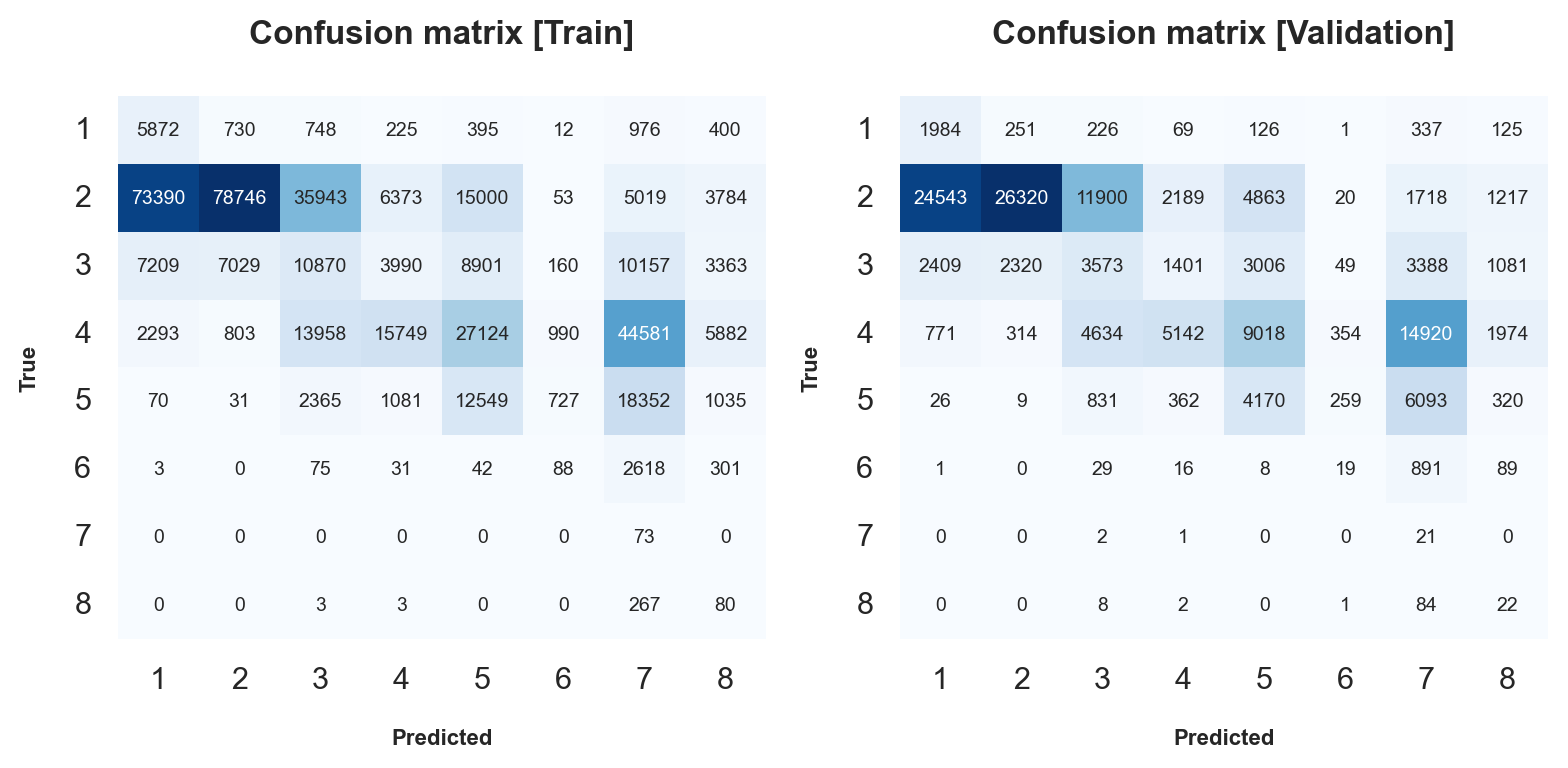

In [32]:
# Classification Metrics & Confusion Matrix
classification_metrics('Naïve Bayes | Ordinal Encoding (W/o Normalization)', nb_cv_ord,
                       y_train, nb_ord_pred_train, nb_ord_pred_train_proba, 
                       y_val, nb_ord_pred_val, nb_ord_pred_val_proba, classification_report=False)

classification_metrics('Naïve Bayes | Ordinal Encoding (With Normalization)', nb_cv_ord_norm,
                        y_train, nb_ord_norm_pred_train, nb_ord_norm_pred_train_proba, 
                        y_val, nb_ord_norm_pred_val, nb_ord_norm_pred_val_proba, classification_report=False)

classification_metrics('Naïve Bayes | One-Hot Encoding', cv_ohe,
                        y_train, nb_ohe_pred_train, nb_ohe_pred_train_proba, 
                        y_val, nb_ohe_pred_val, nb_ohe_pred_val_proba, classification_report=False)

In [26]:
# Dataframe with the results of the models
df_results_train = pd.DataFrame(models_results_train).T
df_results_val = pd.DataFrame(models_results_val).T

# Display the results
display_side_by_side(df_results_train[3:], df_results_val[3:], 
                     titles=['Training Set', 'Validation Set'],
                     super_title='Results of the Naïve Bayes Model')

Results of the Naïve Bayes Model Training Set 
 
 
 
 Time of Execution (KFold) 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Validation Set 
 
 
 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC

---

### **K-Nearest Neighbors (KNN) [<sup>[3]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)** <a class='anchor' id='knn'></a>

- Brute Force Algorithm
- KD Tree Algorithm
- Ball Tree Algorithm

In [51]:
# ------------------------------------------------- K-Nearest Neighbors [Brute Force Algorithm] -------------------------------------------------
# ################################ Ordinal Encoding (with and without Standardization)
# ============ Without Normalization
knn_ord = KNeighborsClassifier(algorithm='brute')
knn_cv_ord = cross_validate(knn_ord,X_train_ordinal_encoded,y_train,cv=5)

# Train the model
knn_ord.fit(X_train_ordinal_encoded, y_train)

# Predictions
knn_ord_pred_train = knn_ord.predict(X_train_ordinal_encoded)
knn_ord_pred_train_proba = knn_ord.predict_proba(X_train_ordinal_encoded)

knn_ord_pred_val = knn_ord.predict(X_val_ordinal_encoded)
knn_ord_pred_val_proba = knn_ord.predict_proba(X_val_ordinal_encoded)

# ============ With Normalization
knn_ord_norm = KNeighborsClassifier(algorithm='brute')
knn_cv_ord_norm = cross_validate(knn_ord_norm,X_train_norm,y_train,cv=5)

# Train the model
knn_ord_norm.fit(X_train_norm, y_train)

# Predictions
knn_ord_norm_pred_train = knn_ord_norm.predict(X_train_norm)
knn_ord_norm_pred_train_proba = knn_ord_norm.predict_proba(X_train_norm)

knn_ord_norm_pred_val = knn_ord_norm.predict(X_val_ordinal_encoded)
knn_ord_norm_pred_val_proba = knn_ord_norm.predict_proba(X_val_ordinal_encoded)

# ################################ One-Hot Encoding
knn_ohe = KNeighborsClassifier(algorithm='brute')
cv_ohe = cross_validate(knn_ohe,X_train_ohe,y_train,cv=5)

# Train the model
knn_ohe.fit(X_train_ohe, y_train)

# Predictions
knn_ohe_pred_train = knn_ohe.predict(X_train_ohe)
knn_ohe_pred_train_proba = knn_ohe.predict_proba(X_train_ohe)

knn_ohe_pred_val = knn_ohe.predict(X_val_ohe)
knn_ohe_pred_val_proba = knn_ohe.predict_proba(X_val_ohe)

## Time of Execution KNN (Brute Force Algorithm) = 32m 15.5s

c:\Anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# ------------------------------------------------- K-Nearest Neighbors [KD Tree Algorithm] -------------------------------------------------
# ################################ Ordinal Encoding (with and without Standardization)
# ============ Without Normalization
knn_kd_ord = KNeighborsClassifier(algorithm='kd_tree')
knn_cv_kd_ord = cross_validate(knn_kd_ord, X_train_ordinal_encoded, y_train, cv=5)

# Train the model
knn_kd_ord.fit(X_train_ordinal_encoded, y_train)

# Predictions
knn_kd_ord_pred_train = knn_kd_ord.predict(X_train_ordinal_encoded)
knn_kd_ord_pred_train_proba = knn_kd_ord.predict_proba(X_train_ordinal_encoded)

knn_kd_ord_pred_val = knn_kd_ord.predict(X_val_ordinal_encoded)
knn_kd_ord_pred_val_proba = knn_kd_ord.predict_proba(X_val_ordinal_encoded)

# ============ With Normalization
knn_kd_ord_norm = KNeighborsClassifier(algorithm='kd_tree')
knn_cv_kd_ord_norm = cross_validate(knn_kd_ord_norm, X_train_norm, y_train, cv=5)

# Train the model
knn_kd_ord_norm.fit(X_train_norm, y_train)

# Predictions
knn_kd_ord_norm_pred_train = knn_kd_ord_norm.predict(X_train_norm)
knn_kd_ord_norm_pred_train_proba = knn_kd_ord_norm.predict_proba(X_train_norm)

knn_kd_ord_norm_pred_val = knn_kd_ord_norm.predict(X_val_ordinal_encoded)
knn_kd_ord_norm_pred_val_proba = knn_kd_ord_norm.predict_proba(X_val_ordinal_encoded)

# ################################ One-Hot Encoding
knn_kd_ohe = KNeighborsClassifier(algorithm='kd_tree')
knn_cv_kd_ohe = cross_validate(knn_kd_ohe, X_train_ohe, y_train, cv=5)

# Train the model
knn_kd_ohe.fit(X_train_ohe, y_train)

# Predictions
knn_kd_ohe_pred_train = knn_kd_ohe.predict(X_train_ohe)
knn_kd_ohe_pred_train_proba = knn_kd_ohe.predict_proba(X_train_ohe)

knn_kd_ohe_pred_val = knn_kd_ohe.predict(X_val_ohe)
knn_kd_ohe_pred_val_proba = knn_kd_ohe.predict_proba(X_val_ohe)

## Time of Execution KNN (KD Tree Algorithm) = Xh Xm Xs

In [ ]:

# ------------------------------------------------- K-Nearest Neighbors [Ball Tree Algorithm] -------------------------------------------------
# ################################ Ordinal Encoding (with and without Standardization)
# ============ Without Normalization
knn_ball_ord = KNeighborsClassifier(algorithm='ball_tree')
knn_cv_ball_ord = cross_validate(knn_ball_ord, X_train_ordinal_encoded, y_train, cv=5)

# Train the model
knn_ball_ord.fit(X_train_ordinal_encoded, y_train)

# Predictions
knn_ball_ord_pred_train = knn_ball_ord.predict(X_train_ordinal_encoded)
knn_ball_ord_pred_train_proba = knn_ball_ord.predict_proba(X_train_ordinal_encoded)

knn_ball_ord_pred_val = knn_ball_ord.predict(X_val_ordinal_encoded)
knn_ball_ord_pred_val_proba = knn_ball_ord.predict_proba(X_val_ordinal_encoded)

# ============ With Normalization
knn_ball_ord_norm = KNeighborsClassifier(algorithm='ball_tree')
knn_cv_ball_ord_norm = cross_validate(knn_ball_ord_norm, X_train_norm, y_train, cv=5)

# Train the model
knn_ball_ord_norm.fit(X_train_norm, y_train)

# Predictions
knn_ball_ord_norm_pred_train = knn_ball_ord_norm.predict(X_train_norm)
knn_ball_ord_norm_pred_train_proba = knn_ball_ord_norm.predict_proba(X_train_norm)

knn_ball_ord_norm_pred_val = knn_ball_ord_norm.predict(X_val_ordinal_encoded)
knn_ball_ord_norm_pred_val_proba = knn_ball_ord_norm.predict_proba(X_val_ordinal_encoded)

# ################################ One-Hot Encoding
knn_ball_ohe = KNeighborsClassifier(algorithm='ball_tree')
knn_cv_ball_ohe = cross_validate(knn_ball_ohe, X_train_ohe, y_train, cv=5)

# Train the model
knn_ball_ohe.fit(X_train_ohe, y_train)

# Predictions
knn_ball_ohe_pred_train = knn_ball_ohe.predict(X_train_ohe)
knn_ball_ohe_pred_train_proba = knn_ball_ohe.predict_proba(X_train_ohe)

knn_ball_ohe_pred_val = knn_ball_ohe.predict(X_val_ohe)
knn_ball_ohe_pred_val_proba = knn_ball_ohe.predict_proba(X_val_ohe)

## Time of Execution KNN (Ball Tree Algorithm) = Xh Xm Xs

In [ ]:
# Classification Metrics & Confusion Matrix
classification_metrics('K-Nearest Neighbors | Ordinal Encoding (Brute Force)', knn_cv_ord,
                       y_train, knn_ord_pred_train, knn_ord_pred_train_proba, 
                       y_val, knn_ord_pred_val, knn_ord_pred_val_proba, classification_report=False)

classification_metrics('K-Nearest Neighbors | Ordinal Encoding (KD Tree)', knn_cv_kd_ord,
                        y_train, knn_kd_ord_pred_train, knn_kd_ord_pred_train_proba, 
                        y_val, knn_kd_ord_pred_val, knn_kd_ord_pred_val_proba, classification_report=False)

classification_metrics('K-Nearest Neighbors | Ordinal Encoding (Ball Tree)', knn_cv_ball_ord,
                        y_train, knn_ball_ord_pred_train, knn_ball_ord_pred_train_proba, 
                        y_val, knn_ball_ord_pred_val, knn_ball_ord_pred_val_proba, classification_report=False)

classification_metrics('K-Nearest Neighbors | Ordinal Encoding (Brute Force) [With Normalization]', knn_cv_ord_norm,
                        y_train, knn_ord_norm_pred_train, knn_ord_norm_pred_train_proba, 
                        y_val, knn_ord_norm_pred_val, knn_ord_norm_pred_val_proba, classification_report=False)

classification_metrics('K-Nearest Neighbors | Ordinal Encoding (KD Tree) [With Normalization]', knn_cv_kd_ord_norm,
                        y_train, knn_kd_ord_norm_pred_train, knn_kd_ord_norm_pred_train_proba, 
                        y_val, knn_kd_ord_norm_pred_val, knn_kd_ord_norm_pred_val_proba, classification_report=False)

classification_metrics('K-Nearest Neighbors | Ordinal Encoding (Ball Tree) [With Normalization]', knn_cv_ball_ord_norm,
                        y_train, knn_ball_ord_norm_pred_train, knn_ball_ord_norm_pred_train_proba, 
                        y_val, knn_ball_ord_norm_pred_val, knn_ball_ord_norm_pred_val_proba, classification_report=False)

classification_metrics('K-Nearest Neighbors | One-Hot Encoding (Brute Force)', cv_ohe,
                        y_train, knn_ohe_pred_train, knn_ohe_pred_train_proba, 
                        y_val, knn_ohe_pred_val, knn_ohe_pred_val_proba, classification_report=False)

classification_metrics('K-Nearest Neighbors | One-Hot Encoding (KD Tree)', knn_cv_kd_ohe,
                        y_train, knn_kd_ohe_pred_train, knn_kd_ohe_pred_train_proba, 
                        y_val, knn_kd_ohe_pred_val, knn_kd_ohe_pred_val_proba, classification_report=False)

classification_metrics('K-Nearest Neighbors | One-Hot Encoding (Ball Tree)', knn_cv_ball_ohe,
                        y_train, knn_ball_ohe_pred_train, knn_ball_ohe_pred_train_proba, 
                        y_val, knn_ball_ohe_pred_val, knn_ball_ohe_pred_val_proba, classification_report=False)

In [27]:
# Dataframe with the results of the models
df_results_train = pd.DataFrame(models_results_train).T
df_results_val = pd.DataFrame(models_results_val).T

# Display the results
display_side_by_side(df_results_train[6:], df_results_val[6:], 
                     titles=['Training Set', 'Validation Set'],
                     super_title='Results of the K-Nearest Neighbors Model')

Results of the K-Nearest Neighbors Model Training Set 
 
 
 
 Time of Execution (KFold) 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Validation Set 
 
 
 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC

---

### **Neural Network [<sup>[4]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.neural_network.MLPClassifier.html)** <a class='anchor' id='neural-network'></a>

In [ ]:
# ------------------------------------------------- Neural Network -------------------------------------------------
# ################################ Ordinal Encoding (with and without Standardization)
# ============ Without Normalization
nn_ord = MLPClassifier(max_iter=300, verbose=True, random_state=2024)
nn_cv_ord = cross_validate(nn_ord, X_train_ordinal_encoded, y_train, cv=5)

# Train the model
nn_ord.fit(X_train_ordinal_encoded, y_train)

# Predictions
nn_ord_pred_train = nn_ord.predict(X_train_ordinal_encoded)
nn_ord_pred_train_proba = nn_ord.predict_proba(X_train_ordinal_encoded)

nn_ord_pred_val = nn_ord.predict(X_val_ordinal_encoded)
nn_ord_pred_val_proba = nn_ord.predict_proba(X_val_ordinal_encoded)

# ============ With Normalization
nn_ord_norm = MLPClassifier(max_iter=300, verbose=True, random_state=2024)
nn_cv_ord_norm = cross_validate(nn_ord_norm, X_train_norm, y_train, cv=5)

# Train the model
nn_ord_norm.fit(X_train_norm, y_train)

# Predictions
nn_ord_norm_pred_train = nn_ord_norm.predict(X_train_norm)
nn_ord_norm_pred_train_proba = nn_ord_norm.predict_proba(X_train_norm)

nn_ord_norm_pred_val = nn_ord_norm.predict(X_validation_norm)
nn_ord_norm_pred_val_proba = nn_ord_norm.predict_proba(X_validation_norm)

# ################################ One-Hot Encoding
nn_ohe = MLPClassifier(max_iter=300, verbose=True, random_state=2024)
nn_cv_ohe = cross_validate(nn_ohe, X_train_ohe, y_train, cv=5)

# Train the model
nn_ohe.fit(X_train_ohe, y_train)

# Predictions
nn_ohe_pred_train = nn_ohe.predict(X_train_ohe)
nn_ohe_pred_train_proba = nn_ohe.predict_proba(X_train_ohe)

nn_ohe_pred_val = nn_ohe.predict(X_val_ohe)
nn_ohe_pred_val_proba = nn_ohe.predict_proba(X_val_ohe)

## Time of Execution Neural Network = 57m 22.7s

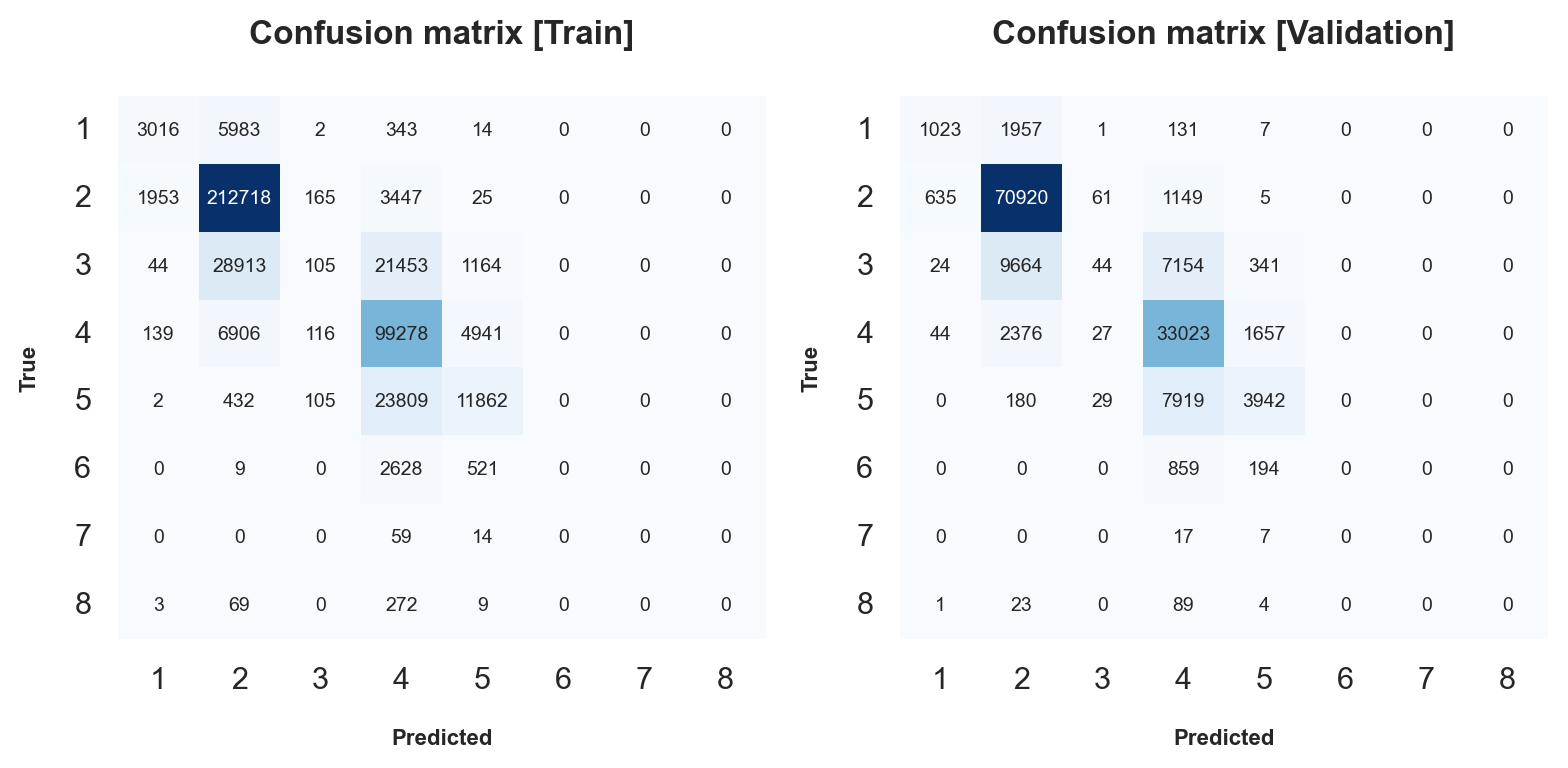

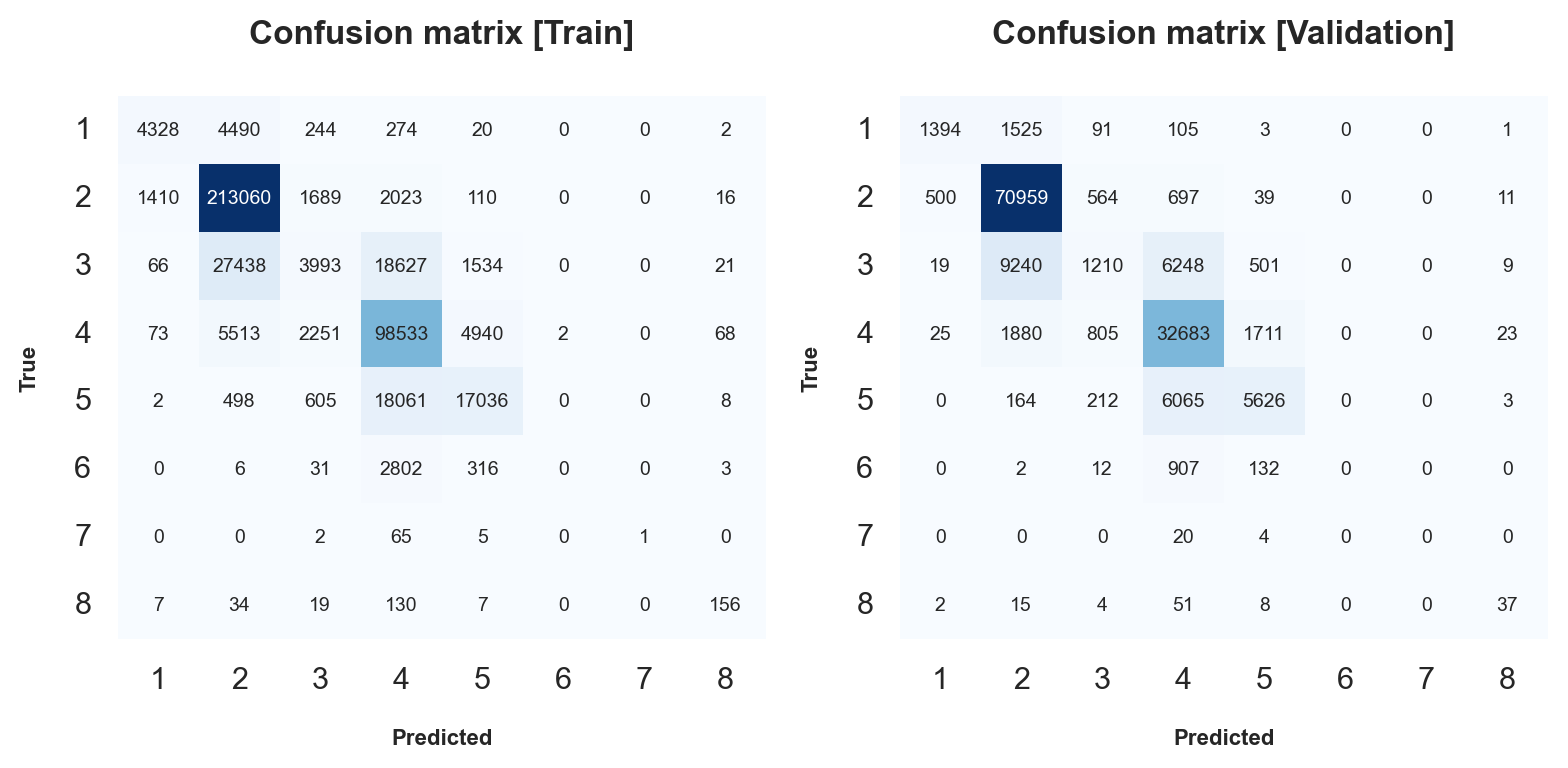

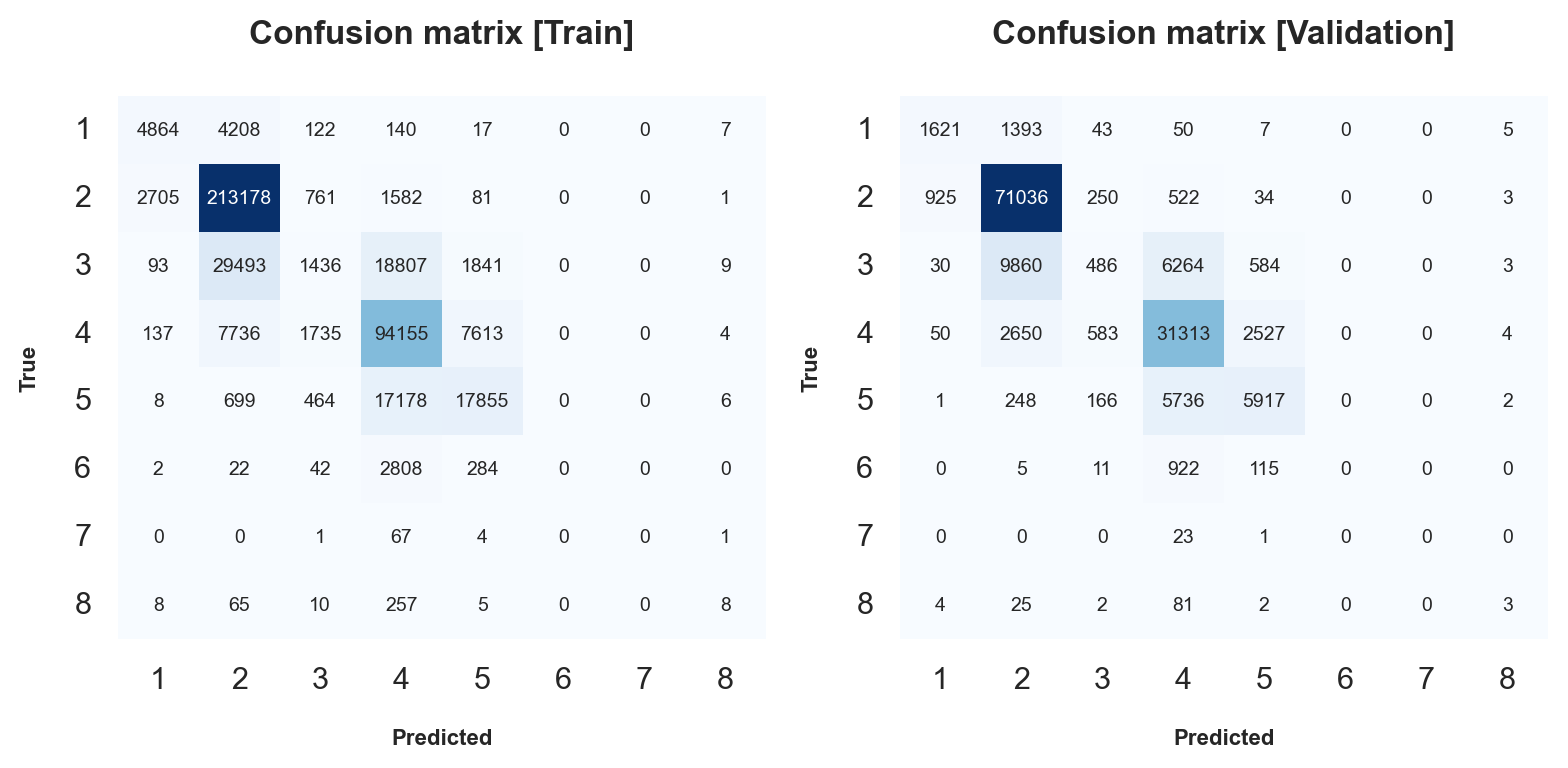

In [29]:
# Classification Metrics & Confusion Matrix
classification_metrics('Neural Network | Ordinal Encoding (W/o Normalization)', nn_cv_ord,
                       y_train, nn_ord_pred_train, nn_ord_pred_train_proba, 
                       y_val, nn_ord_pred_val, nn_ord_pred_val_proba, classification_report=False)

classification_metrics('Neural Network | Ordinal Encoding (With Normalization)', nn_cv_ord_norm,
                        y_train, nn_ord_norm_pred_train, nn_ord_norm_pred_train_proba, 
                        y_val, nn_ord_norm_pred_val, nn_ord_norm_pred_val_proba, classification_report=False)

classification_metrics('Neural Network | One-Hot Encoding', nn_cv_ohe,
                        y_train, nn_ohe_pred_train, nn_ohe_pred_train_proba, 
                        y_val, nn_ohe_pred_val, nn_ohe_pred_val_proba, classification_report=False)

In [30]:
# Dataframe with the results of the models
df_results_train = pd.DataFrame(models_results_train).T
df_results_val = pd.DataFrame(models_results_val).T

# Display the results
display_side_by_side(df_results_train, df_results_val, 
                     titles=['Training Set', 'Validation Set'],
                     super_title='Results of the Neural Network Model')

Results of the Neural Network Model Training Set 
 
 
 
 Time of Execution (KFold) 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Logistic Regression | Ordinal Encoding (W/o Normalization) 
 63.12 +/-0.64 
 0.76 
 0.6 
 0.31 
 0.32 
 0.9 
 
 
 Logistic Regression | Ordinal Encoding (With Normalization) 
 58.1 +/-1.09 
 0.76 
 0.6 
 0.31 
 0.32 
 0.9 
 
 
 Logistic Regression | One-Hot Encoding 
 63.66 +/-0.35 
 0.51 
 0.46 
 0.13 
 0.08 
 0.66 
 
 
 Neural Network | Ordinal Encoding (W/o Normalization) 
 559.47 +/-9.15 
 0.76 
 0.59 
 0.31 
 0.31 
 0.88 
 
 
 Neural Network | Ordinal Encoding (With Normalization) 
 1305.84 +/-17.19 
 0.78 
 0.63 
 0.42 
 0.44 
 0.93 
 
 
 Neural Network | One-Hot Encoding 
 946.38 +/-32.14 
 0.77 
 0.56 
 0.36 
 0.36 
 0.91 
 
 
 Validation Set 
 
 
 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Logistic Regression | Ordinal Encoding (W/o Normalization) 
 0.51 
 0.51 
 0.12 
 0.08 
 0.50 
 
 
 Logistic Regression | Ordinal Encoding (With Normalization) 
 0.51 
 0.51 
 0.12 
 0.08 
 0.50 
 
 
 Logistic Regression | One-Hot Encoding 
 0.51 
 0.31 
 0.13 
 0.08 
 0.64 
 
 
 Neural Network | Ordinal Encoding (W/o Normalization) 
 0.76 
 0.60 
 0.32 
 0.31 
 0.88 
 
 
 Neural Network | Ordinal Encoding (With Normalization) 
 0.78 
 0.64 
 0.39 
 0.41 
 0.92 
 
 
 Neural Network | One-Hot Encoding 
 0.77 
 0.54 
 0.36 
 0.36 
 0.91

---

### **Decision Tree[<sup>[5]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html)** <a class='anchor' id='decision-tree'></a>

In [ ]:
# ------------------------------------------------- Decision Tree -------------------------------------------------
# ################################ Ordinal Encoding (with and without Standardization)
# ============ Without Normalization
dt_ord = DecisionTreeClassifier()
dt_cv_ord = cross_validate(dt_ord, X_train_ordinal_encoded, y_train, cv=5)

# Train the model
dt_ord.fit(X_train_ordinal_encoded, y_train)

# Predictions
dt_ord_pred_train = dt_ord.predict(X_train_ordinal_encoded)
dt_ord_pred_train_proba = dt_ord.predict_proba(X_train_ordinal_encoded)

dt_ord_pred_val = dt_ord.predict(X_val_ordinal_encoded)
dt_ord_pred_val_proba = dt_ord.predict_proba(X_val_ordinal_encoded)

# ============ With Normalization
dt_ord_norm = DecisionTreeClassifier()
dt_cv_ord_norm = cross_validate(dt_ord_norm, X_train_norm, y_train, cv=5)

# Train the model
dt_ord_norm.fit(X_train_norm, y_train)

# Predictions
dt_ord_norm_pred_train = dt_ord_norm.predict(X_train_norm)
dt_ord_norm_pred_train_proba = dt_ord_norm.predict_proba(X_train_norm)

dt_ord_norm_pred_val = dt_ord_norm.predict(X_val_ordinal_encoded)
dt_ord_norm_pred_val_proba = dt_ord_norm.predict_proba(X_val_ordinal_encoded)

# ################################ One-Hot Encoding
dt_ohe = DecisionTreeClassifier()
dt_cv_ohe = cross_validate(dt_ohe, X_train_ohe, y_train, cv=5)

# Train the model
dt_ohe.fit(X_train_ohe, y_train)

# Predictions
dt_ohe_pred_train = dt_ohe.predict(X_train_ohe)
dt_ohe_pred_train_proba = dt_ohe.predict_proba(X_train_ohe)

dt_ohe_pred_val = dt_ohe.predict(X_val_ohe)
dt_ohe_pred_val_proba = dt_ohe.predict_proba(X_val_ohe)

In [ ]:
# Classification Metrics & Confusion Matrix
classification_metrics('Decision Tree | Ordinal Encoding (W/o Normalization)', dt_cv_ord,
                       y_train, dt_ord_pred_train, dt_ord_pred_train_proba, 
                       y_val, dt_ord_pred_val, dt_ord_pred_val_proba, classification_report=False)

classification_metrics('Decision Tree | Ordinal Encoding (With Normalization)', dt_cv_ord_norm,
                        y_train, dt_ord_norm_pred_train, dt_ord_norm_pred_train_proba, 
                        y_val, dt_ord_norm_pred_val, dt_ord_norm_pred_val_proba, classification_report=False)

classification_metrics('Decision Tree | One-Hot Encoding', dt_cv_ohe,
                        y_train, dt_ohe_pred_train, dt_ohe_pred_train_proba, 
                        y_val, dt_ohe_pred_val, dt_ohe_pred_val_proba, classification_report=False)

In [ ]:
# Dataframe with the results of the models
df_results_train = pd.DataFrame(models_results_train).T
df_results_val = pd.DataFrame(models_results_val).T

# Display the results
display_side_by_side(df_results_train[12:], df_results_val[12:], 
                     titles=['Training Set', 'Validation Set'],
                     super_title='Results of the Decision Tree Model')

---

### **Random Forest[<sup>[6]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html)** <a class='anchor' id='random-forest'></a>

In [ ]:
# ------------------------------------------------- Random Forest -------------------------------------------------
# ################################ Ordinal Encoding (with and without Standardization)
# ============ Without Normalization
rf_ord = RandomForestClassifier()
rf_cv_ord = cross_validate(rf_ord, X_train_ordinal_encoded, y_train, cv=5)

# Train the model
rf_ord.fit(X_train_ordinal_encoded, y_train)

# Predictions
rf_ord_pred_train = rf_ord.predict(X_train_ordinal_encoded)
rf_ord_pred_train_proba = rf_ord.predict_proba(X_train_ordinal_encoded)

rf_ord_pred_val = rf_ord.predict(X_val_ordinal_encoded)
rf_ord_pred_val_proba = rf_ord.predict_proba(X_val_ordinal_encoded)

# ============ With Normalization
rf_ord_norm = RandomForestClassifier()
rf_cv_ord_norm = cross_validate(rf_ord_norm, X_train_norm, y_train, cv=5)

# Train the model
rf_ord_norm.fit(X_train_norm, y_train)

# Predictions
rf_ord_norm_pred_train = rf_ord_norm.predict(X_train_norm)
rf_ord_norm_pred_train_proba = rf_ord_norm.predict_proba(X_train_norm)

rf_ord_norm_pred_val = rf_ord_norm.predict(X_val_ordinal_encoded)
rf_ord_norm_pred_val_proba = rf_ord_norm.predict_proba(X_val_ordinal_encoded)

# ################################ One-Hot Encoding
rf_ohe = RandomForestClassifier()
rf_cv_ohe = cross_validate(rf_ohe, X_train_ohe, y_train, cv=5)

# Train the model
rf_ohe.fit(X_train_ohe, y_train)

# Predictions
rf_ohe_pred_train = rf_ohe.predict(X_train_ohe)
rf_ohe_pred_train_proba = rf_ohe.predict_proba(X_train_ohe)

rf_ohe_pred_val = rf_ohe.predict(X_val_ohe)
rf_ohe_pred_val_proba = rf_ohe.predict_proba(X_val_ohe)

In [ ]:
# Classification Metrics & Confusion Matrix
classification_metrics('Random Forest | Ordinal Encoding (W/o Normalization)', rf_cv_ord,
                       y_train, rf_ord_pred_train, rf_ord_pred_train_proba, 
                       y_val, rf_ord_pred_val, rf_ord_pred_val_proba, classification_report=False)

classification_metrics('Random Forest | Ordinal Encoding (With Normalization)', rf_cv_ord_norm,
                        y_train, rf_ord_norm_pred_train, rf_ord_norm_pred_train_proba, 
                        y_val, rf_ord_norm_pred_val, rf_ord_norm_pred_val_proba, classification_report=False)

classification_metrics('Random Forest | One-Hot Encoding', rf_cv_ohe,
                        y_train, rf_ohe_pred_train, rf_ohe_pred_train_proba, 
                        y_val, rf_ohe_pred_val, rf_ohe_pred_val_proba, classification_report=False)

In [ ]:
# Dataframe with the results of the models
df_results_train = pd.DataFrame(models_results_train).T
df_results_val = pd.DataFrame(models_results_val).T

# Display the results
display_side_by_side(df_results_train[15:], df_results_val[15:], 
                     titles=['Training Set', 'Validation Set'],
                     super_title='Results of the Random Forest Model')

---

### **Support Vector Machine (SVM)[<sup>[7]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html)** <a class='anchor' id='svm'></a>

In [ ]:
# ------------------------------------------------- Support Vector Machine (SVM) -------------------------------------------------
# ################################ Ordinal Encoding (with and without Standardization)
# ============ Without Normalization
svm_ord = SVC(probability=True)
svm_cv_ord = cross_validate(svm_ord, X_train_ordinal_encoded, y_train, cv=5)

# Train the model
svm_ord.fit(X_train_ordinal_encoded, y_train)

# Predictions
svm_ord_pred_train = svm_ord.predict(X_train_ordinal_encoded)
svm_ord_pred_train_proba = svm_ord.predict_proba(X_train_ordinal_encoded)

svm_ord_pred_val = svm_ord.predict(X_val_ordinal_encoded)
svm_ord_pred_val_proba = svm_ord.predict_proba(X_val_ordinal_encoded)

# ============ With Normalization
svm_ord_norm = SVC(probability=True)
svm_cv_ord_norm = cross_validate(svm_ord_norm, X_train_norm, y_train, cv=5)

# Train the model
svm_ord_norm.fit(X_train_norm, y_train)

# Predictions
svm_ord_norm_pred_train = svm_ord_norm.predict(X_train_norm)
svm_ord_norm_pred_train_proba = svm_ord_norm.predict_proba(X_train_norm)

svm_ord_norm_pred_val = svm_ord_norm.predict(X_validation_norm)
svm_ord_norm_pred_val_proba = svm_ord_norm.predict_proba(X_validation_norm)

# ################################ One-Hot Encoding
svm_ohe = SVC(probability=True)
svm_cv_ohe = cross_validate(svm_ohe, X_train_ohe, y_train, cv=5)

# Train the model
svm_ohe.fit(X_train_ohe, y_train)

# Predictions
svm_ohe_pred_train = svm_ohe.predict(X_train_ohe)
svm_ohe_pred_train_proba = svm_ohe.predict_proba(X_train_ohe)

svm_ohe_pred_val = svm_ohe.predict(X_val_ohe)
svm_ohe_pred_val_proba = svm_ohe.predict_proba(X_val_ohe)

In [ ]:
# Classification Metrics & Confusion Matrix
classification_metrics('SVM | Ordinal Encoding (W/o Normalization)', svm_cv_ord,
                       y_train, svm_ord_pred_train, svm_ord_pred_train_proba, 
                       y_val, svm_ord_pred_val, svm_ord_pred_val_proba, classification_report=False)

classification_metrics('SVM | Ordinal Encoding (With Normalization)', svm_cv_ord_norm,
                        y_train, svm_ord_norm_pred_train, svm_ord_norm_pred_train_proba, 
                        y_val, svm_ord_norm_pred_val, svm_ord_norm_pred_val_proba, classification_report=False)

classification_metrics('SVM | One-Hot Encoding', svm_cv_ohe,
                        y_train, svm_ohe_pred_train, svm_ohe_pred_train_proba, 
                        y_val, svm_ohe_pred_val, svm_ohe_pred_val_proba, classification_report=False)

In [ ]:
# Dataframe with the results of the models
df_results_train = pd.DataFrame(models_results_train).T
df_results_val = pd.DataFrame(models_results_val).T

# Display the results
display_side_by_side(df_results_train[18:], df_results_val[18:], 
                     titles=['Training Set', 'Validation Set'],
                     super_title='Results of the Support Vector Machine Model')

---

### **Gradient Boosting[<sup>[8]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)** <a class='anchor' id='gradient-boosting'></a>

In [ ]:
# ------------------------------------------------- Gradient Boosting -------------------------------------------------
# ################################ Ordinal Encoding (with and without Standardization)
# ============ Without Normalization
gb_ord = GradientBoostingClassifier()
gb_cv_ord = cross_validate(gb_ord, X_train_ordinal_encoded, y_train, cv=5)

# Train the model
gb_ord.fit(X_train_ordinal_encoded, y_train)

# Predictions
gb_ord_pred_train = gb_ord.predict(X_train_ordinal_encoded)
gb_ord_pred_train_proba = gb_ord.predict_proba(X_train_ordinal_encoded)

gb_ord_pred_val = gb_ord.predict(X_val_ordinal_encoded)
gb_ord_pred_val_proba = gb_ord.predict_proba(X_val_ordinal_encoded)

# ============ With Normalization
gb_ord_norm = GradientBoostingClassifier()
gb_cv_ord_norm = cross_validate(gb_ord_norm, X_train_norm, y_train, cv=5)

# Train the model
gb_ord_norm.fit(X_train_norm, y_train)

# Predictions
gb_ord_norm_pred_train = gb_ord_norm.predict(X_train_norm)
gb_ord_norm_pred_train_proba = gb_ord_norm.predict_proba(X_train_norm)

gb_ord_norm_pred_val = gb_ord_norm.predict(X_validation_norm)
gb_ord_norm_pred_val_proba = gb_ord_norm.predict_proba(X_validation_norm)

# ################################ One-Hot Encoding
gb_ohe = GradientBoostingClassifier()
gb_cv_ohe = cross_validate(gb_ohe, X_train_ohe, y_train, cv=5)

# Train the model
gb_ohe.fit(X_train_ohe, y_train)

# Predictions
gb_ohe_pred_train = gb_ohe.predict(X_train_ohe)
gb_ohe_pred_train_proba = gb_ohe.predict_proba(X_train_ohe)

gb_ohe_pred_val = gb_ohe.predict(X_val_ohe)
gb_ohe_pred_val_proba = gb_ohe.predict_proba(X_val_ohe)

In [ ]:
# Classification Metrics & Confusion Matrix
classification_metrics('Gradient Boosting | Ordinal Encoding (W/o Normalization)', gb_cv_ord,
                       y_train, gb_ord_pred_train, gb_ord_pred_train_proba, 
                       y_val, gb_ord_pred_val, gb_ord_pred_val_proba, classification_report=False)

classification_metrics('Gradient Boosting | Ordinal Encoding (With Normalization)', gb_cv_ord_norm,
                        y_train, gb_ord_norm_pred_train, gb_ord_norm_pred_train_proba, 
                        y_val, gb_ord_norm_pred_val, gb_ord_norm_pred_val_proba, classification_report=False)

classification_metrics('Gradient Boosting | One-Hot Encoding', gb_cv_ohe,
                        y_train, gb_ohe_pred_train, gb_ohe_pred_train_proba, 
                        y_val, gb_ohe_pred_val, gb_ohe_pred_val_proba, classification_report=False)

In [ ]:
# Dataframe with the results of the models
df_results_train = pd.DataFrame(models_results_train).T
df_results_val = pd.DataFrame(models_results_val).T

# Display the results
display_side_by_side(df_results_train[21:], df_results_val[21:], 
                     titles=['Training Set', 'Validation Set'],
                     super_title='Results of the Gradient Boosting Model')

---

### **XGBoost[<sup>[9]</sup>](https://xgboost.readthedocs.io/en/latest/python/python_api.html)** <a class='anchor' id='xgboost'></a>

---

### <a class='anchor' id='3_1'></a> **🧪 Model Selection**

In [ ]:
# Save the results in a Excel file
df_results_train.index.name = 'Model'
df_results_val.index.name = 'Model'

df_results_train.to_excel('data/3rdNotebook/Models_Results.xlsx', sheet_name='Train')
df_results_val.to_excel('data/3rdNotebook/Models_Results.xlsx', sheet_name='Validation')

---

### <a class='anchor' id='3_2'></a> **📏 Model Evaluation**

---

### <a class='anchor' id='3_3'></a> **📈 Model Optimization**

---

### 📊 **Feature Importance**

---

## 🔮 **Test Data Prediction**

In [ ]:
# Predictions on the test_data
pred_test_ord = knn_ball_ohe.predict(test_data_ordinal_encoded)
pred_test_ohe = knn_ball_ohe.predict(test_data_ohe)

In [ ]:
# Dictionary with the mapping of the predicted values
claim_injury_type_dict_swapped = {1: "1. CANCELLED", 2: "2. NON-COMP", 3: "3. MED ONLY", 4: "4. TEMPORARY",
                                  5: "5. PPD SCH LOSS", 6: "6. PPD NSL", 7: "7. PTD", 8: "8. DEATH"}

# Create a DataFrame with the 'ID' and the 'Predicted' columns
submission_data = pd.DataFrame({'Claim Identifier': test_data['Claim Identifier'], 'Claim Injury Type': pred_test_ohe})
submission_data['Claim Injury Type'] = submission_data['Claim Injury Type'].map(claim_injury_type_dict_swapped)
submission_data

---

## 📋 **CSV Export - Submission**

In [62]:
# Each submission in Kaggle should have different names and should have the version name in the following format 
# – GroupXX_VersionXX.csv (for example, Group 1 submitted his 8th version, the file should be named Group01__Version08.csv)

submission_data.to_csv('submissions/Group33_Version01.csv', index=False, header=True, sep=',')
# submission_data.to_csv('submissions/Group33_Version02.csv', index=False, header=True, sep=',')

---